In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = w.wrangle_zillow(cached=True)

In [17]:
a = pd.DataFrame(df.columns)
a

,0
0,heating_system_type_id
1,bathrooms
2,bedrooms
3,prop_sqft
4,fips
5,fireplace_cnt
6,latitude
7,longitude
8,lot_sqft
9,pool_cnt


In [3]:
df.shape

(60240, 35)

In [ ]:
w.missing_zero_values_table(df)

In [5]:
binary_vars = ['pool_cnt', 'fireplace_flag','la_cnty', 'orange_cnty', 'ventura_cnty', 'cola']
categorical_vars = ['heating_system_type_id', 'fips', 'fireplace_cnt', \
                    'heating_system_desc', 'region_id_city', 'acres_bin', 'sqft_bin',\
                    'structure_dollar_sqft_bin']
quant_vars = [ 'bathrooms', 'bedrooms', 'prop_sqft', 'lot_sqft', 'year_built',\
              'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', \
              'structure_dollar_per_sqft', 'bath_bed_ratio']
categorical_target = 'log_error_class'
continuous_target = 'log_error'

In [6]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [7]:
train, validate, test = w.train_validate_test_scale(train, validate, test, quant_vars)

In [ ]:
ex.explore_univariate(train, categorical_vars, quant_vars)

In [ ]:
ex.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

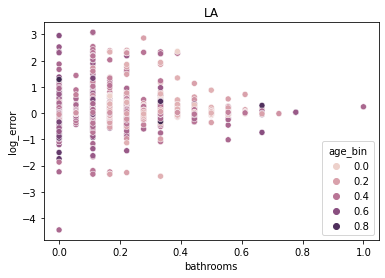

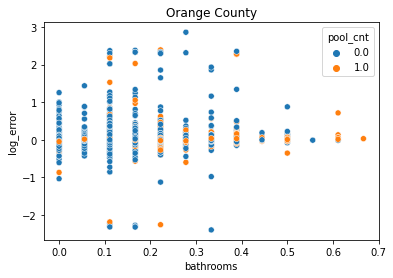

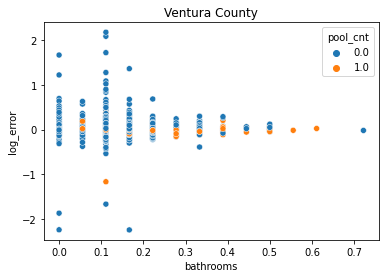

In [10]:
sns.scatterplot(data=train[train.la_cnty == 1] y=continuous_target, x='bathrooms', hue='age_bin')
plt.title('LA')
plt.show()
sns.scatterplot(data=train[train.orange_cnty == 1], y=continuous_target, x='bathrooms', hue='pool_cnt')
plt.title("Orange County")
plt.show()
sns.scatterplot(data=train[train.ventura_cnty == 1], y=continuous_target, x='bathrooms', hue='pool_cnt')
plt.title('Ventura County')
plt.show()

# Kmeans

In [37]:
from sklearn.cluster import KMeans

## pool_cnt and log_error in The City of Los Angeles

In [38]:
X = train[train.cola == 1]

In [39]:
X_scaled = X[['pool_cnt','log_error']]

In [40]:
# define the model
kmeans = KMeans(n_clusters=3)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [41]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X.head()

,heating_system_type_id,bathrooms,bedrooms,prop_sqft,fips,fireplace_cnt,latitude,longitude,lot_sqft,pool_cnt,...,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
11088598,2,0.111111,0.2,0.174974,6037,0.0,0.342455,-1.185729,0.183232,0.0,...,0.178466,0.2,0.4,0.078994,0.2,36.397607,0.3,0.166667,1,0
11954739,7,0.000000,0.1,0.055567,6037,0.0,0.340922,-1.182334,0.103937,0.0,...,0.105556,0.1,0.0,0.164365,0.5,67.123967,0.4,0.107143,1,1
11756926,2,0.111111,0.1,0.115015,6037,0.0,0.340603,-1.183220,0.250718,0.0,...,0.240519,0.2,0.3,0.142212,0.4,5.222869,0.2,0.285714,1,1
11977321,7,0.000000,0.2,0.052196,6037,0.0,0.341214,-1.181892,0.065838,0.0,...,0.070523,0.0,0.0,0.158382,0.4,122.347331,0.5,0.047619,1,1
10878044,7,0.111111,0.3,0.134014,6037,0.0,0.342095,-1.183828,0.151150,0.0,...,0.148967,0.1,0.3,0.076730,0.2,26.583295,0.3,0.107143,1,1


In [42]:
kmeans.cluster_centers_

array([[ 1.58730159e-01,  1.08617337e+00],
       [-2.72004641e-15,  1.46179403e-03],
       [ 1.00000000e+00,  2.24418145e-04]])

In [43]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['pool_cnt','log_error'])
centroids_scaled

,pool_cnt,log_error
0,1.587302e-01,1.086173
1,-2.720046e-15,0.001462
2,1.000000e+00,0.000224


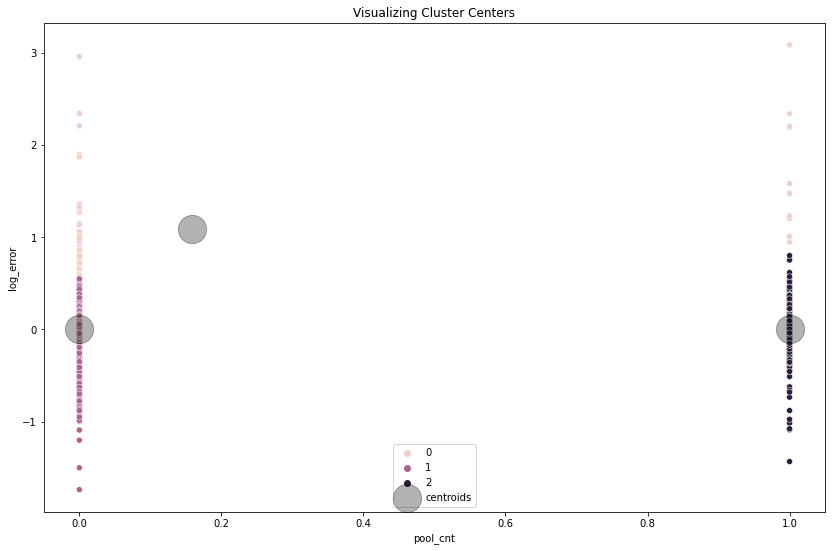

In [44]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'pool_cnt', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'pool_cnt', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## fireplace count vs log error in properties with a central heating system 

In [85]:
X = train[train.heating_system_type_id == 2] 

In [86]:
X_scaled = X[['fireplace_cnt','log_error']]

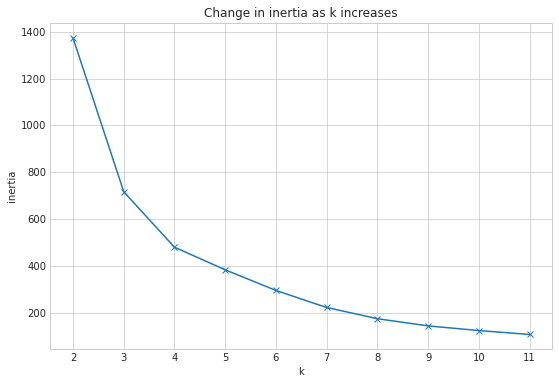

In [87]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [88]:
# define the model
kmeans = KMeans(n_clusters=4)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

array([1, 1, 0, ..., 2, 1, 0], dtype=int32)

In [89]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X.head()

,heating_system_type_id,bathrooms,bedrooms,prop_sqft,fips,fireplace_cnt,latitude,longitude,lot_sqft,pool_cnt,...,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
14610791,2,0.111111,0.1,0.095506,6059,0.0,0.335743,-1.177207,0.077048,0.0,...,0.080831,0.0,0.2,0.139966,0.4,69.823914,0.4,0.285714,0,1
11583704,2,0.222222,0.1,0.116139,6037,0.0,0.340242,-1.184900,0.176591,0.0,...,0.172360,0.2,0.3,0.198263,0.5,61.248002,0.4,0.464286,0,1
14298103,2,0.444444,0.5,0.238917,6059,1.0,0.336748,-1.178230,0.174294,0.0,...,0.170248,0.2,0.5,0.082418,0.3,85.497033,0.4,0.226190,0,0
11580695,2,0.222222,0.3,0.316650,6037,0.0,0.340380,-1.184979,0.215265,0.0,...,0.207920,0.2,0.7,0.042022,0.1,15.546980,0.2,0.196429,0,1
12867887,2,0.111111,0.3,0.156078,6037,0.0,0.341045,-1.177325,0.192095,0.0,...,0.186616,0.2,0.4,0.088709,0.3,4.303604,0.1,0.107143,0,1


In [90]:
kmeans.cluster_centers_

array([[ 1.00000000e+00,  1.11509909e-02],
       [-5.27355937e-15,  1.04794379e-02],
       [ 2.16998192e+00,  1.74881526e-02],
       [ 1.48148148e-01,  1.53487513e+00]])

In [91]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['fireplace_cnt','log_error'])
centroids_scaled


,fireplace_cnt,log_error
0,1.000000e+00,0.011151
1,-5.273559e-15,0.010479
2,2.169982e+00,0.017488
3,1.481481e-01,1.534875


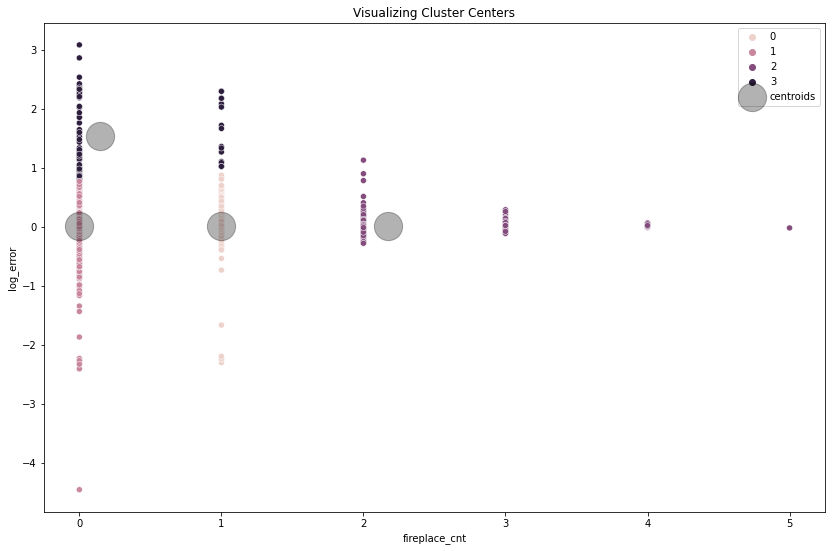

In [92]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'fireplace_cnt', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'fireplace_cnt', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in Ventura county

In [98]:
X = train[train.fips == 6111] 

In [99]:
X_scaled = X[['lot_sqft','log_error']]

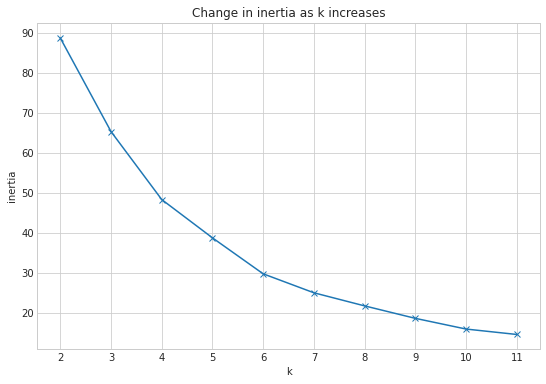

In [100]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [101]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

array([2, 2, 2, ..., 0, 1, 2], dtype=int32)

In [102]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,lot_sqft,log_error,cluster
parcelid,,,
17099897,0.143435,0.000083,2
17171089,0.050308,0.001150,2
17062669,0.130527,0.018328,2
17295565,0.087010,-0.001395,2
17289940,0.649839,-0.023418,1


In [103]:
kmeans.cluster_centers_

array([[ 0.2506745 , -0.00186554],
       [ 0.63662011,  0.01761099],
       [ 0.12101193,  0.01976947],
       [ 0.2181859 , -1.83488963],
       [ 0.18187291,  0.94573973]])

In [104]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


,lot_sqft,log_error
0,0.250675,-0.001866
1,0.636620,0.017611
2,0.121012,0.019769
3,0.218186,-1.834890
4,0.181873,0.945740


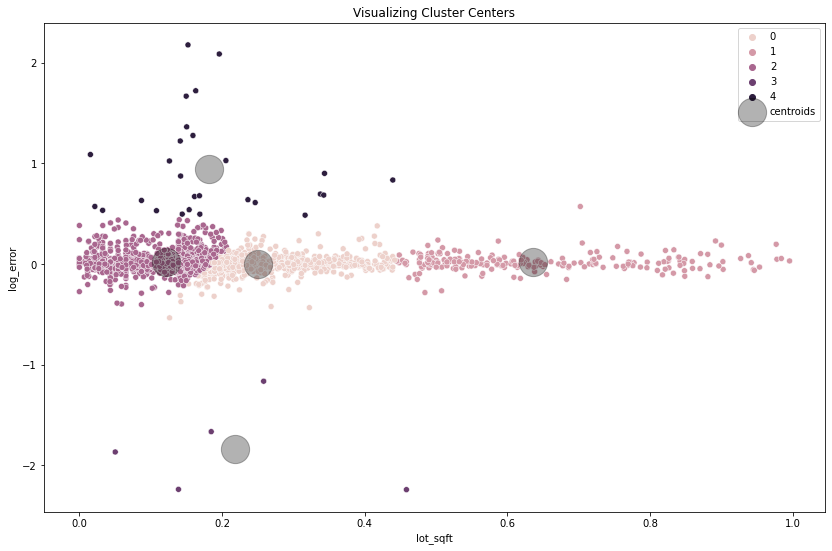

In [105]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in Orange county

In [106]:
X = train[train.fips == 6059] 

In [107]:
X_scaled = X[['lot_sqft','log_error']]

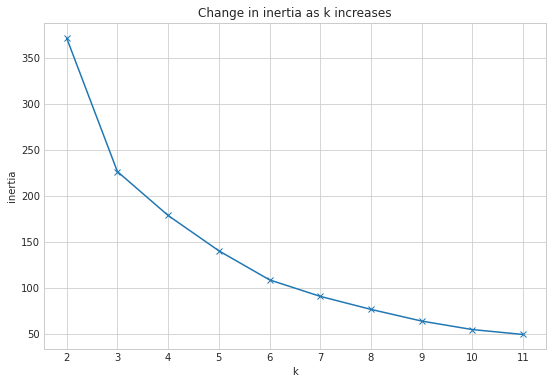

In [108]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [109]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

array([1, 1, 1, ..., 1, 3, 1], dtype=int32)

In [110]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,lot_sqft,log_error,cluster
parcelid,,,
14610791,0.077048,-0.013214,1
14298103,0.174294,0.014255,1
13848136,0.190123,0.052217,1
13936084,0.169076,0.003068,1
13999070,0.145482,0.072179,1


In [111]:
kmeans.cluster_centers_

array([[ 0.14776421, -2.17867754],
       [ 0.15354044,  0.00666918],
       [ 0.1785033 ,  0.56913269],
       [ 0.61525782,  0.00577764],
       [ 0.23549314,  2.17610613]])

In [112]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


,lot_sqft,log_error
0,0.147764,-2.178678
1,0.153540,0.006669
2,0.178503,0.569133
3,0.615258,0.005778
4,0.235493,2.176106


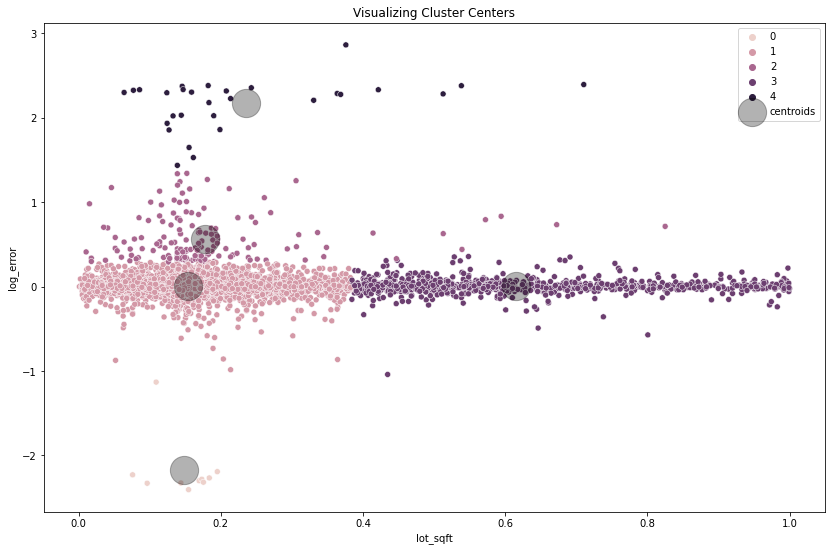

In [113]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in LA county

In [114]:
X = train[train.fips == 6037] 

In [115]:
X_scaled = X[['lot_sqft','log_error']]

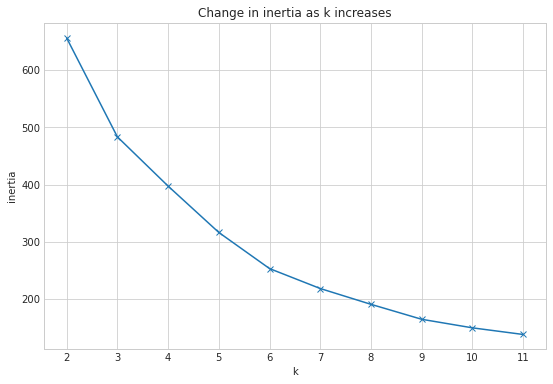

In [116]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [117]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

array([1, 4, 1, ..., 1, 1, 1], dtype=int32)

In [118]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,lot_sqft,log_error,cluster
parcelid,,,
11583704,0.176591,-0.052392,1
11580695,0.215265,0.699342,4
12867887,0.192095,0.054507,1
11088598,0.183232,0.576041,4
11232047,0.996954,-0.070691,3


In [119]:
kmeans.cluster_centers_

array([[ 0.40914982,  0.00457245],
       [ 0.15834096, -0.01025623],
       [ 0.21528363,  1.75936013],
       [ 0.78512682,  0.01496534],
       [ 0.17252602,  0.31483599]])

In [120]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


,lot_sqft,log_error
0,0.409150,0.004572
1,0.158341,-0.010256
2,0.215284,1.759360
3,0.785127,0.014965
4,0.172526,0.314836


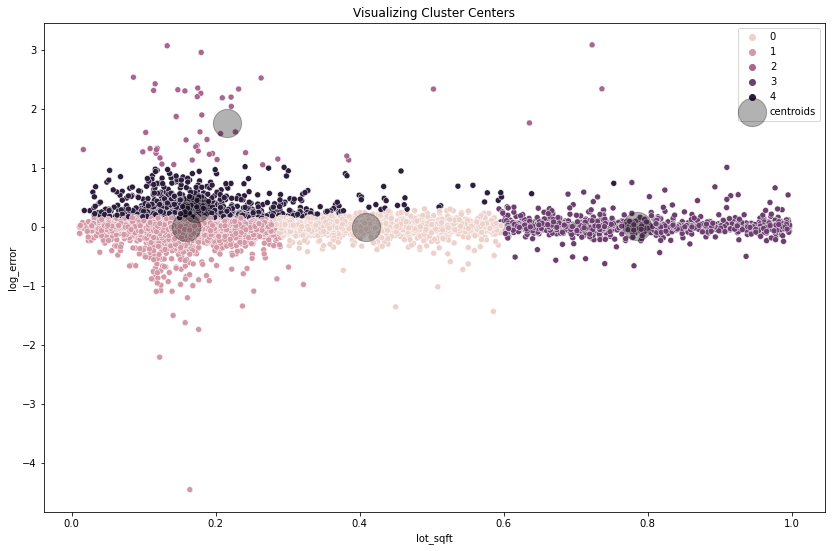

In [121]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

## Lot size and log error in LA City

In [122]:
X = train[train.cola == 1] 

In [123]:
X_scaled = X[['lot_sqft','log_error']]

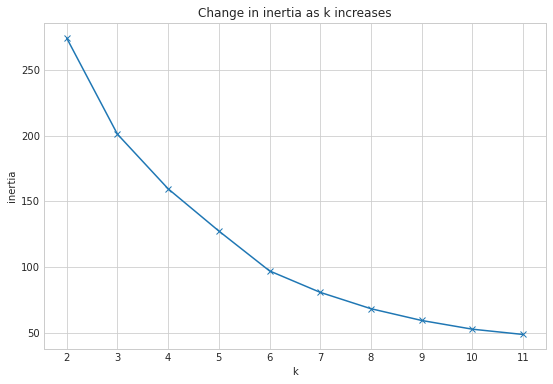

In [124]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [125]:
# define the model
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(X_scaled)

# make predictions
kmeans.predict(X_scaled)

array([4, 1, 1, ..., 1, 1, 1], dtype=int32)

In [126]:
X['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,lot_sqft,log_error,cluster
parcelid,,,
11088598,0.183232,0.576041,4
11954739,0.103937,0.128462,1
11756926,0.250718,-0.043759,1
11977321,0.065838,-0.120735,1
10878044,0.151150,0.068346,1


In [127]:
kmeans.cluster_centers_

array([[ 0.4112089 ,  0.01707209],
       [ 0.15842262,  0.01719505],
       [ 0.18869906, -0.37360906],
       [ 0.77561697,  0.02197743],
       [ 0.22321879,  1.06025222]])

In [128]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = ['lot_sqft','log_error'])
centroids_scaled


,lot_sqft,log_error
0,0.411209,0.017072
1,0.158423,0.017195
2,0.188699,-0.373609
3,0.775617,0.021977
4,0.223219,1.060252


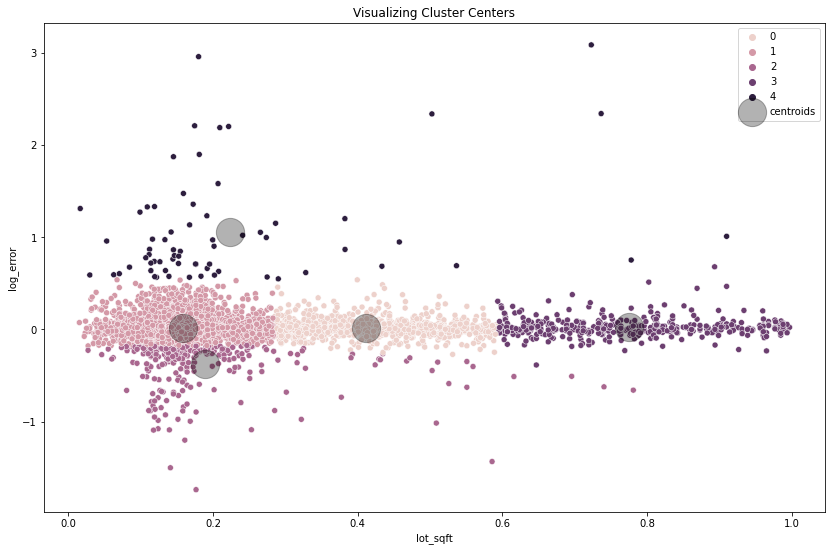

In [129]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'log_error', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'log_error', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();